<a href="https://colab.research.google.com/github/sha-shank469/ML_Algorithms/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Implementation of Convolutional Neural Network**




In [3]:
import numpy as np
from numpy import asarray
data = [[3,3,2,1,0],
        [0,0,1,3,1],
        [3,1,2,2,3],
        [2,0,0,2,2],
        [2,0,0,0,1]]
data = np.asarray(data)
data = data.reshape(1,5,5,1)

kernal = [[[[0]],[[1]],[[2]]],
           [[[2]],[[2]],[[0]]],
           [[[0]],[[1]],[[2]]]]
weights = [asarray(kernal),asarray([0.0])]

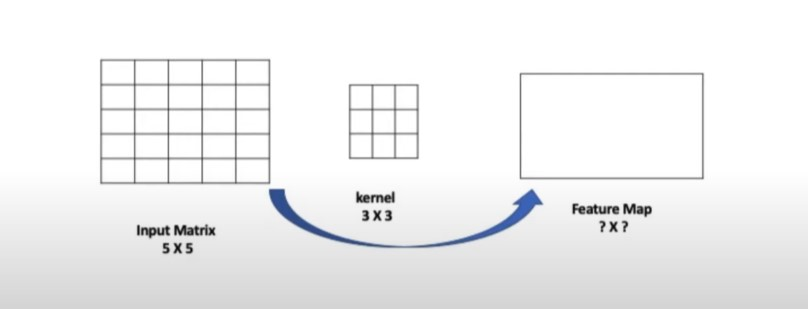

In [8]:
from IPython.display import Image
Image(filename = '/content/drive/MyDrive/Kernal.jpg')

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
# create model
model = Sequential()
model.add(Conv2D(1,(3,3),input_shape=(5,5,1)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 3, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
  print([yhat[0,r,c,0]for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 338ms/step
[12.0, 12.0, 17.0]
[10.0, 17.0, 19.0]
[9.0, 6.0, 14.0]


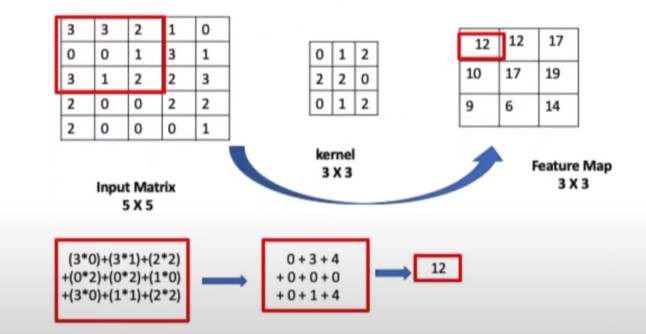

In [12]:
Image(filename = '/content/drive/MyDrive/Kernal_2.jpg')

## **Strides**

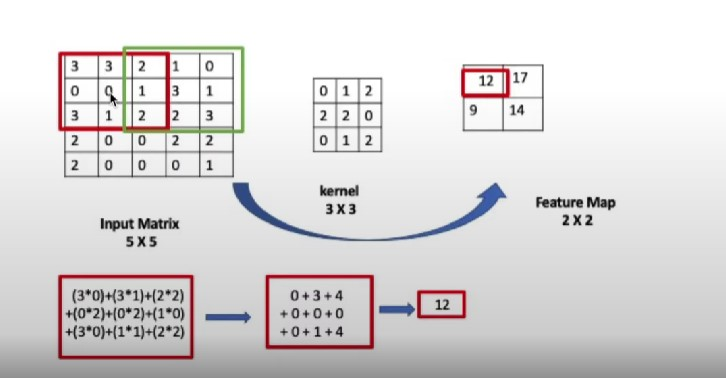

In [14]:
Image (filename = '/content/drive/MyDrive/Stride.jpg')

In [17]:
model = Sequential()
model.add(Conv2D(1,(3,3), strides=(2,2), input_shape=(5,5,1)))
model.summary()
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
  print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 2, 2, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 44ms/step
[12.0, 17.0]
[9.0, 14.0]


### **Padding**

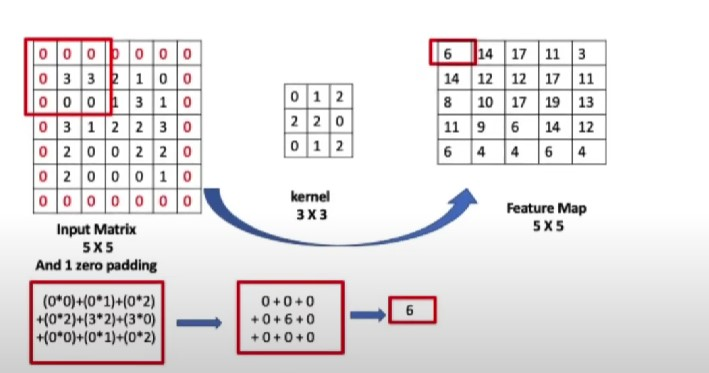

In [18]:
Image(filename = '/content/drive/MyDrive/Padding.jpg')

In [19]:
model = Sequential()
model.add(Conv2D(1,(3,3), padding = 'same', input_shape=(5,5,1)))
model.summary()
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
  print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 40ms/step
[6.0, 14.0, 17.0, 11.0, 3.0]
[14.0, 12.0, 12.0, 17.0, 11.0]
[8.0, 10.0, 17.0, 19.0, 13.0]
[11.0, 9.0, 6.0, 14.0, 12.0]
[6.0, 4.0, 4.0, 6.0, 4.0]


## **Max Pooling**

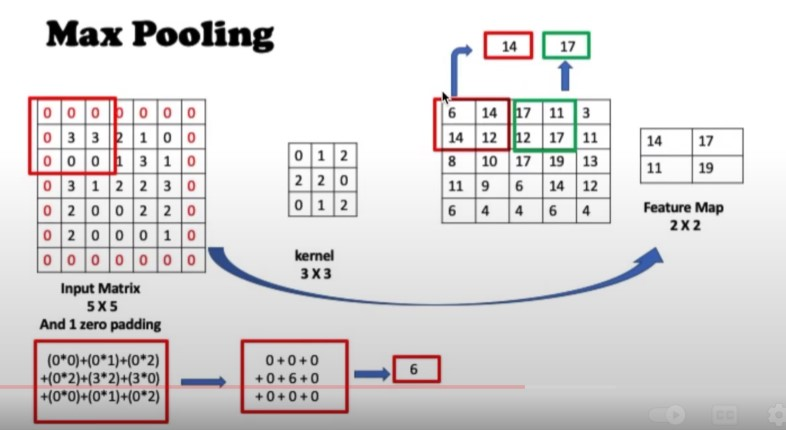

In [20]:
Image(filename = '/content/drive/MyDrive/Max_Pooling.jpg')

In [21]:
from keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(1,(3,3),padding = 'same',input_shape=(5,5,1)))
model.add((MaxPooling2D(2,2)))
model.summary()
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
  print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 1)          0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 70ms/step
[14.0, 17.0]
[11.0, 19.0]


## **Average Pooling**

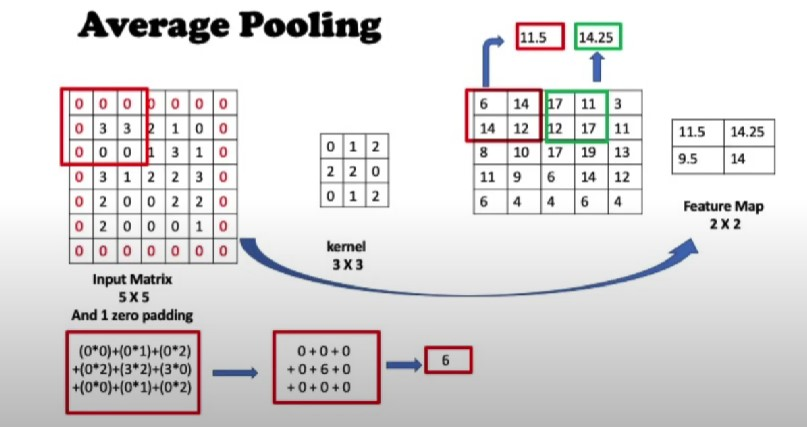

In [22]:
Image(filename = '/content/drive/MyDrive/AveragePool.jpg')

In [26]:
from keras.layers import AveragePooling2D
model = Sequential()
model.add(Conv2D(1,(3,3),padding = 'same',input_shape=(5,5,1)))
model.add(AveragePooling2D((2,2)))
model.summary()
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
  print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 average_pooling2d (AverageP  (None, 2, 2, 1)          0         
 ooling2D)                                                       
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 47ms/step
[11.5, 14.25]
[9.5, 14.0]


## **Flatten**

In [29]:
from keras.layers import Flatten 
model = Sequential()
model.add(Conv2D(1,(3,3),padding='same',input_shape=(5,5,1)))
model.add(AveragePooling2D((2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 5, 5, 1)           10        
                                                                 
 average_pooling2d_2 (Averag  (None, 2, 2, 1)          0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
